## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 6: Fourier Analysis
## Due November 17, 2024 by 11:59 PM
### <span style="color: red">Enrique Antunano</span>

Copyright &copy; 2024, University of Washington

<hr>

**Instructions**: Please use this notebook as a template. Answer all questions using well formatted Markdown with embedded LaTeX equations, executable Jupyter cells, or both. Submit your homework solutions as an `.ipynb` file via Canvas.

<span style="color: red'">
Although you may discuss the homework with others, you must turn in your own, original work.
</span>

**Things to remember:**
- Use complete sentences. Equations should appear in text as grammatical elements.
- Comment your code.
- Label your axes. Title your plots. Use legends where appropriate.
- Before submitting a notebook, choose Kernel -> Restart and Run All to make sure your notebook runs when the cells are evaluated in order.


### 0. Warmup (Do not turn in)

- Make sure you download, read, and run the notebook for lecture 7. Work through the notebook cell by cell and see what happens when you change the expressions, and make up some of your own.
- The material covered in class is intended to be an introductory overview of the incredibly rich and expansive subject of Fourier Analysis.
- If you would like more resources, the following book is a good place to start. It is actually the notes used to teach intro signal processing at Stanford. Most of the material I covered in class is in these notes, plu a whole lot more.
> Osgood, [Lecture notes for EE 261](
https://see.stanford.edu/materials/lsoftaee261/book-fall-07.pdf).
- A more advanced and concise treatment of the subject is in the following book.
> Stein and Shakarchi, [Fourier Analysis: An Introduction](https://www.amazon.com/Fourier-Analysis-Introduction-Princeton-Lectures/dp/069111384X/ref=sr_1_1?keywords=stein+and+shakarchi+fourier&qid=1572974320&sr=8-1).

In [1]:
import math
import scipy # Has linear algebra
import scipy.ndimage
import numpy as np
import sympy as sm
sm.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import matplotlib.patches as pch
%matplotlib inline
from matplotlib.ticker import MaxNLocator # to make integer ticks on x axis

### 1. Exponential form of Complex Numbers

Express each of the following complex numbers in the form $r e^{i\theta}$. Do this by hand (or in Latex) and check your work with Python.

$$0$$
$$1$$
$$-1$$
$$i$$
$$1-2i$$
$$-8+7i$$

In [2]:
# Solve and plot complex vectors
r, theta = sm.symbols("r,theta")

complex_numbers     = [0,1,-1,sm.I,1-(2*sm.I),-8+(7*sm.I)]
abs_array           = []
arctan_array        = []

for x in range(len(complex_numbers)):
    abs_complex_num      = abs(complex_numbers[x])
    arctan_complex_num   = sm.arg(complex_numbers[x])

    abs_array.append(abs_complex_num)
    arctan_array.append(arctan_complex_num)

complex_numbers,abs_array, arctan_array

⎛                                                          ⎡           π       ↪
⎜[0, 1, -1, ⅈ, 1 - 2⋅ⅈ, -8 + 7⋅ⅈ], [0, 1, 1, 1, √5, √113], ⎢nan, 0, π, ─, -ata ↪
⎝                                                          ⎣           2       ↪

↪                    ⎤⎞
↪ n(2), π - atan(7/8)⎥⎟
↪                    ⎦⎠

1. 
a. Calculate the $\textbf{Magnitude}$ of $\textit{z}$, $$|z| = r = \sqrt{a^2 + b^2} = \sqrt{0^2 + 0^2} = 0$$
$$re^{\textit{i} \theta} = r(cos\theta+i sin \theta) = 0 * (cos\theta+i sin \theta) = 0$$

b. Calculate the $\textbf{Magnitude}$ of $\textit{z}$, $$|z| = r = \sqrt{a^2 + b^2} = \sqrt{1^2 + 0^2} = 1$$
Calculate $\textbf{argument}$ of $\textit{z}$, $$ \theta = arctan(y,x) = arctan(\frac{0}{1}) = 0$$
$$re^{\textit{i} \theta} = 1 * e^{\textit{i} * 0} = e^{0} = 1$$

c. Calculate the $\textbf{Magnitude}$ of $\textit{z}$, $$|z| = r = \sqrt{a^2 + b^2} = \sqrt{(-1)^2 + 0^2} = 1$$
Calculate $\textbf{argument}$ of $\textit{z}$, $$ \theta = arctan(y,x) = arctan(- \frac{0}{1}) = \pi$$
$$re^{\textit{i} \theta} = 1 * e^{\pi \textit{i} } = e^{\pi \textit{i} } = -1$$

d. Calculate the $\textbf{Magnitude}$ of $\textit{z}$, $$|z| = r = \sqrt{a^2 + b^2} = \sqrt{(0)^2 + 1^2} = 1$$
Calculate $\textbf{argument}$ of $\textit{z}$, $$ \theta = arctan(y,x) = arctan(1,0) \rightarrow \text{ Coordinates (0,1) for y>0: } \frac{\pi}{2}$$
$$re^{\textit{i} \theta} = 1 * e^{\frac{\pi}{2} \textit{i}} = e^{\frac{\pi}{2} \textit{i}} = \textit{i}$$

e. Calculate the $\textbf{Magnitude}$ of $\textit{z}$, $$|z| = r = \sqrt{a^2 + b^2} = \sqrt{(1)^2 + 2^2} = \sqrt{5}$$
Calculate $\textbf{argument}$ of $\textit{z}$, $$ \theta = arctan(y,x) = arctan(\frac{-2}{1})$$
Since angle is in the fourth quadrant, $$= - arctan(2)$$
$$ = - arctan(2) \approx -1.11 radians$$
$$re^{\textit{i} \theta} = \sqrt{5} e^{-1.11 \textit{i}}$$

f. Calculate the $\textbf{Magnitude}$ of $\textit{z}$, $$|z| = r = \sqrt{a^2 + b^2} = \sqrt{(-8)^2 + 7^2} = \sqrt{64+49} = \sqrt{113}$$
Calculate $\textbf{argument}$ of $\textit{z}$, $$ \theta = arctan(y,x) = arctan(\frac{7}{-8})$$
Since angle is in the second quadrant, $$= \pi - arctan(\frac{7}{8})$$
$$ arctan(\frac{7}{8}) \approx 0.7188 radians$$
$$= \pi - 0.7188 \approx 2.423$$
$$re^{\textit{i} \theta} = \sqrt{113} e^{2.423 \textit{i}}$$

### 2. A Trigonometric Identity

The goal of this exercise is to find formulas for $\cos(\alpha+\beta)$ and $\sin(\alpha + \beta)$. in terms of $\sin\alpha$, $\sin\beta$, $\cos\alpha$, and $\cos\beta$.

a) First, express $e^{(\alpha+\beta)i}$ directly in terms of the $\sin$ and $\cos$ using Euler's formula.

b) Next, express $e^{(\alpha+\beta)i}$ as a product of two exponentials. Then convert each term in the product into $\sin$ and $\cos$ using Euler's formula. Expand the expression and group the terms in the real part and the imaginary part.

c) Equate the real parts and imaginary parts from (a) and (b).

<br><br>
a) Convert from exponential form to trigonometric function form,
$$e^{(\alpha + \beta) \textit{i}} = cos(\alpha + \beta) + \textit{i } sin(\alpha + \beta)$$

b) First, express $e^{(\alpha + \beta) \textit{i}}$ as a product of exponentials,
$$ e^{(\alpha + \beta) \textit{i}} = e^{\alpha \textit{i}}e^{\beta \textit{i}}$$

Convert each term in the product from exponential form to trigonometric function form,
$$ e^{\alpha \textit{i}} = cos\alpha + \textit{i } sin\alpha$$
$$ e^{\beta \textit{i}} = cos\beta + \textit{i } sin\beta$$
$$ e^{\alpha \textit{i}}e^{\beta \textit{i}} = (cos\alpha + \textit{i } sin\alpha)(cos\beta + \textit{i } sin\beta)$$

Expand the expression,
$$ e^{\alpha \textit{i}}e^{\beta \textit{i}} = cos\alpha cos\beta + \textit{ i } cos\alpha sin\beta + \textit{ i } cos\beta sin\alpha - sin\alpha sin\beta$$

Group terms into real and imaginary parts,
$$ e^{\alpha \textit{i}}e^{\beta \textit{i}} = cos\alpha cos\beta - sin\alpha sin\beta + \textit{ i } (cos\alpha sin\beta + cos\beta sin\alpha)$$

c)
From $\textbf{part a}$, expand $e^{(\alpha + \beta) \textit{i}} = cos(\alpha + \beta) + \textit{i } sin(\alpha + \beta)$ in terms of $\sin\alpha$, $\sin\beta$, $\cos\alpha$, and $\cos\beta$ using the trigonometric angle sum and difference indentities,
$$ cos(\alpha + \beta) = \cos\alpha \cos\beta - \sin\alpha \sin\beta$$
$$ sin(\alpha + \beta) = \sin\alpha \cos\beta + \cos\alpha \sin\beta$$

Substitute these values back into $cos(\alpha + \beta) + \textit{i } sin(\alpha + \beta)$,
$$e^{(\alpha + \beta) \textit{i}} = \cos\alpha \cos\beta - \sin\alpha \sin\beta + \textit{i }(\sin\alpha \cos\beta + \cos\alpha \sin\beta)$$

The results from $\textbf{part a}$ and $\textbf{part b}$ are identical.
$$e^{(\alpha + \beta) \textit{i}} =  e^{\alpha \textit{i}}e^{\beta \textit{i}} = \cos\alpha \cos\beta - \sin\alpha \sin\beta + \textit{i }(\sin\alpha \cos\beta + \cos\alpha \sin\beta)$$

### 3. Fourier Series Approximation

Similar to the example of the square wave done in class, find a Fourier Series approximation to the function

$$
f(t) = \left |cos(2\pi t) \right|
$$

which is a *rectified cosine*. Make sure you get the period of this function correct. Make a plot with three subplots for $N=5$, $N=10$, and $N=20$ showing better and better approximations.

3. Period $\frac{1}{2}$ or from -L to L = $0$ to $0.5$. <br>
First, since $f(t)$ is an absolute value, the domain will be analzyed in two parts based as described below.
$$
f(t) = 
\begin{cases} 
    cos(2 \pi t) &\text{if } 0 <= t < \frac{1}{4} \\
    -cos(2 \pi t) &\text{if } \frac{1}{4} <= t < \frac{1}{2}
\end{cases}
$$

Second, $f(t)$ is an even function, thus we know that $b_n = 0$. This means only coefficients $a_0$ and $a_n$ need to be computed. <br>
Solve for $a_0$,
$$ a_0 = \frac{1}{2*\frac{1}{4}} \int_{0}^{\frac{1}{4}} cos(2 \pi t) - \int_{\frac{1}{4}}^{\frac{1}{2}} cos(2 \pi t)$$
$$ = 2 (\int_{0}^{\frac{1}{4}} cos(2 \pi t) - \int_{\frac{1}{4}}^{\frac{1}{2}} cos(2 \pi t))$$
$$ = 2 ( \frac{1}{2 \pi} + \frac{1}{2 \pi})$$
$$ = \frac{2}{\pi}$$

Solve for $a_n$,
$$ a_n = \frac{1}{\frac{1}{4}} \int_{0}^{\frac{1}{4}} cos(2 \pi t) * cos(2 \pi t \frac{n}{\frac{1}{2}}) - \int_{\frac{1}{4}}^{\frac{1}{2}} cos(2 \pi t) * cos(2 \pi t \frac{n}{\frac{1}{2}})$$
$$ = 4 (\int_{0}^{\frac{1}{4}} cos(2 \pi t) * cos(4 \pi t n) - \int_{\frac{1}{4}}^{\frac{1}{2}} cos(2 \pi t) * cos(4 \pi t n))$$

Fourier series approximation, 
$$f(t) = \frac{a_0}{2} + \sum_{n=1}^{N} a_n cos(4 \pi t n)$$


In [3]:
# Quick example to show both parts of the domain are even functions
sm.cos(2*sm.pi*(-3)), sm.cos(2*sm.pi*(3)),-sm.cos(2*sm.pi*(-3)), -sm.cos(2*sm.pi*(3))

(1, 1, -1, -1)

In [4]:
# Rectified cosine
t = sm.symbols("t", real=True)
n = sm.symbols("n", integer=True, positive=True)
T = sm.Rational(1,4)

an_cos = sm.cos(4*sm.pi*n*t)

# piece-wise form of function
a = sm.integrate(sm.cos(2*sm.pi*t)*an_cos,(t,0,T)) 
b = -sm.integrate(sm.cos(2*sm.pi*t)*an_cos,(t,T,(2*T)))
an = 4*(a+b)*an_cos
an,an.simplify()

⎛       n                       n              ⎞
⎜-8⋅(-1) ⋅cos(4⋅π⋅n⋅t)   -4⋅(-1) ⋅cos(4⋅π⋅n⋅t) ⎟
⎜──────────────────────, ──────────────────────⎟
⎜          2                    ⎛   2    ⎞     ⎟
⎝     8⋅π⋅n  - 2⋅π            π⋅⎝4⋅n  - 1⎠     ⎠

In [5]:
# Here are some of the terms of the Fourier Series
vals = range(0,20)
fn = -((4*((-1)**n)*an_cos)/(sm.pi*(4*(n**2)-1)))*an_cos
terms = [(1/sm.pi) if k == 0 else fn.subs(n,k) for k in vals]
terms

⎡        2               2               2                2                2   ↪
⎢1  4⋅cos (4⋅π⋅t)  -4⋅cos (8⋅π⋅t)   4⋅cos (12⋅π⋅t)  -4⋅cos (16⋅π⋅t)   4⋅cos (2 ↪
⎢─, ─────────────, ───────────────, ──────────────, ────────────────, ──────── ↪
⎣π       3⋅π            15⋅π             35⋅π             63⋅π             99⋅ ↪

↪               2                2                2                2           ↪
↪ 0⋅π⋅t)  -4⋅cos (24⋅π⋅t)   4⋅cos (28⋅π⋅t)  -4⋅cos (32⋅π⋅t)   4⋅cos (36⋅π⋅t)   ↪
↪ ──────, ────────────────, ──────────────, ────────────────, ──────────────,  ↪
↪ π            143⋅π            195⋅π            255⋅π            323⋅π        ↪

↪       2                2                2                2                2  ↪
↪ -4⋅cos (40⋅π⋅t)   4⋅cos (44⋅π⋅t)  -4⋅cos (48⋅π⋅t)   4⋅cos (52⋅π⋅t)  -4⋅cos ( ↪
↪ ────────────────, ──────────────, ────────────────, ──────────────, ──────── ↪
↪      399⋅π            483⋅π            575⋅π            675⋅π            783 ↪

↪                2       

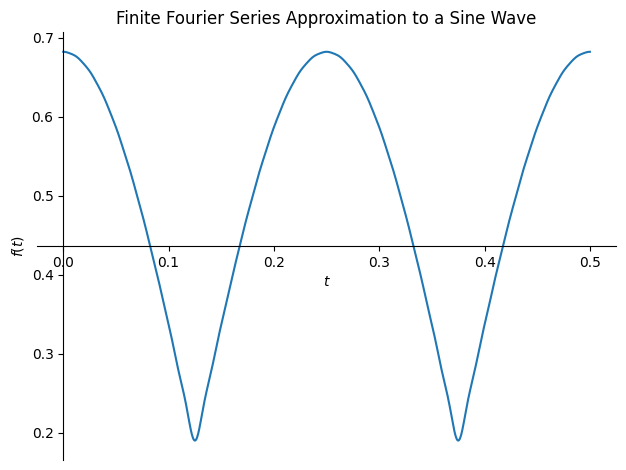

     2               2               2                2                2       ↪
4⋅cos (4⋅π⋅t)   4⋅cos (8⋅π⋅t)   4⋅cos (12⋅π⋅t)   4⋅cos (16⋅π⋅t)   4⋅cos (20⋅π⋅ ↪
───────────── - ───────────── + ────────────── - ────────────── + ──────────── ↪
     3⋅π            15⋅π             35⋅π             63⋅π             99⋅π    ↪

↪           2                2                2                2               ↪
↪ t)   4⋅cos (24⋅π⋅t)   4⋅cos (28⋅π⋅t)   4⋅cos (32⋅π⋅t)   4⋅cos (36⋅π⋅t)   4⋅c ↪
↪ ── - ────────────── + ────────────── - ────────────── + ────────────── - ─── ↪
↪          143⋅π            195⋅π            255⋅π            323⋅π            ↪

↪   2                2                2                2                2      ↪
↪ os (40⋅π⋅t)   4⋅cos (44⋅π⋅t)   4⋅cos (48⋅π⋅t)   4⋅cos (52⋅π⋅t)   4⋅cos (56⋅π ↪
↪ ─────────── + ────────────── - ────────────── + ────────────── - ─────────── ↪
↪  399⋅π            483⋅π            575⋅π            675⋅π            783⋅π   ↪

↪            2           

In [6]:
# Plot the sum of all the terms versus theta
fapprox = sum(terms)     
sm.plot(fapprox,(t,0,0.5),title="Finite Fourier Series Approximation to a Sine Wave");

### 4. Orthogonality

Show that $\cos(2\pi t)$ and $\sin(2 \pi t)$ are orthogonal by showing that their inner product (a.k.a. dot product) is zero. Hint: Express the two functions in exponential form, and expand their product inside the integral.

4. Express $cos(2 \pi t)$ in exponential form,
$$ e^{ix} + e^{-ix} = cosx + \cancel{isinx} + cosx - \cancel{isinx}$$
Simplify,
$$ e^{ix} + e^{-ix} = 2cosx$$
Divide by 2, 
$$ \frac{1}{2}(e^{ix} + e^{-ix}) = cosx$$
Replace x with $2 \pi t$,
$$ \frac{1}{2}(e^{i 2 \pi t} + e^{-i 2 \pi t}) = cos 2 \pi t$$

<br><br>Express $sin(2 \pi t)$ in exponential form,
$$ e^{ix} - e^{-ix} = \cancel{cosx} + isinx - \cancel{cosx} + isinx$$
Simplify,
$$ e^{ix} - e^{-ix} = 2isinx$$
Divide by $2i$, 
$$ \frac{1}{2i}(e^{ix} - e^{-ix}) = sinx$$
Replace x with $2 \pi t$,
$$ \frac{1}{2i}(e^{i 2 \pi t} - e^{-i 2 \pi t}) = sin 2 \pi t$$

<br><br>Set $\psi_m = cos(2 \pi t)$
<br>Set $\psi_n = sin(2 \pi t)$

Assume $\psi_m$ and $\psi_n$ are orthognol vectors, so $\lt \psi_m, \psi_n \gt = 0$
<br> Here, we'll assume $m \neq n$,
$$ \lt \psi_m, \psi_n \gt = \int_{0}^{1} \frac{1}{2}(e^{i 2 \pi m t} + e^{-i 2 \pi m t}) (-\frac{1}{2i}(e^{-i 2 \pi n t} - e^{i 2 \pi n t})) dt$$
$$= \int_{0}^{1} \frac{1}{2}(e^{i 2 \pi m t} + e^{-i 2 \pi m t}) \frac{1}{2i}(e^{i 2 \pi n t} - e^{-i 2 \pi n t}) dt$$
$$= \frac{1}{4i} \int_{0}^{1} (e^{i 2 \pi m t} + e^{-i 2 \pi m t}) (e^{i 2 \pi n t} - e^{-i 2 \pi n t}) dt$$
Simply the R.H.S,
$$= \frac{1}{4i} \int_{0}^{1} e^{i2(n+m)πt} + e^{-i2(n-m)πt} - e^{i2(n-m)πt}  - e^{-i2(n+m)πt}$$
Integrate,
$$= \frac{1}{4i} (\int_{0}^{1} e^{i2(n+m)πt} + \int_{0}^{1} e^{-i2(n-m)πt} - \int_{0}^{1} e^{i2(n-m)πt}  - \int_{0}^{1} e^{-i2(n+m)πt})$$
All integrals will evaluate to the value in their exponential over 1 multiplied by $(1-1)$ or $0$, thus,
$$= \frac{1}{4i} * 0 * 0 * 0 * 0$$
$$= 0$$

In [7]:
m,n,t = sm.symbols("m,n,t")

expr1 = (1/2)*((sm.exp(sm.I*2*sm.pi*m*t))+(sm.exp(-sm.I*2*sm.pi*m*t)))
expr2 = (1/(2*sm.I))*((sm.exp(sm.I*2*sm.pi*n*t))-(sm.exp(-sm.I*2*sm.pi*n*t)))
mult_exp = expr1*expr2
# intg_exp = A = sm.integrate(mult_exp,(t,0,1))
expr1,expr2,mult_exp,mult_exp.simplify()
# expr1,expr2,mult_exp,mult_exp.simplify(),intg_exp

⎛                                     ⎛ 2⋅ⅈ⋅π⋅n⋅t    -2⋅ⅈ⋅π⋅n⋅t⎞      ⎛     2⋅ ↪
⎜     2⋅ⅈ⋅π⋅m⋅t        -2⋅ⅈ⋅π⋅m⋅t  -ⅈ⋅⎝ℯ          - ℯ          ⎠   -ⅈ⋅⎝0.5⋅ℯ   ↪
⎜0.5⋅ℯ          + 0.5⋅ℯ          , ──────────────────────────────, ─────────── ↪
⎝                                                2                             ↪

↪ ⅈ⋅π⋅m⋅t        -2⋅ⅈ⋅π⋅m⋅t⎞ ⎛ 2⋅ⅈ⋅π⋅n⋅t    -2⋅ⅈ⋅π⋅n⋅t⎞                        ↪
↪         + 0.5⋅ℯ          ⎠⋅⎝ℯ          - ℯ          ⎠          ⎛     4⋅ⅈ⋅π⋅n ↪
↪ ──────────────────────────────────────────────────────, 0.25⋅ⅈ⋅⎝1 - ℯ        ↪
↪                      2                                                       ↪

↪                                       ⎞
↪ ⋅t⎞ ⎛ 4⋅ⅈ⋅π⋅m⋅t    ⎞  -2⋅ⅈ⋅π⋅t⋅(m + n)⎟
↪   ⎠⋅⎝ℯ          + 1⎠⋅ℯ                ⎟
↪                                       ⎠

### 5. Fourier Transforms

Find the Fourier Transforms of the following functions. You can use `sympy`.
Make sure to simplify, these shouldn't give complicated results.

Plot original functions and their transforms in a nice 3 $\times$ 2 grid of plots. Label the sub plots.

$$
f(t) = \left \{
\begin{array}{l}
1 \;\mathrm{if} \;t \geq 0 \\
0 \;\mathrm{else}
\end{array}
\right .
$$

$$
f(t) = \frac{1}{1+t^2}
$$

$$
f(t) = e^{-\pi t^2}
$$

In [8]:
# Setup functions in time domain
t,w = sm.var("t,w")
ft1 = sm.Piecewise((1,t>=0),(0,True))
ft2 = 1/(1+t**2)
ft3 = sm.exp(-sm.pi*t**2)

# lambdify each function in time domain
ft1_lam = sm.lambdify(t,ft1)
ft2_lam = sm.lambdify(t,ft2)
ft3_lam = sm.lambdify(t,ft3)

# Solve for $F(\omega)$
Ff1_1 = sm.integrate((sm.exp(-2*sm.pi*sm.I*w*t)*1),(t,0,sm.oo))
Ff1_2 = sm.integrate((sm.exp(-2*sm.pi*sm.I*w*t)*0),(t,-sm.oo,0))
Ff2 = sm.integrate((sm.exp(-2*sm.pi*sm.I*w*t)*ft2),(t,-sm.oo,sm.oo))
Ff3 = sm.integrate((sm.exp(-2*sm.pi*sm.I*w*t)*ft3),(t,-sm.oo,sm.oo))

Ff1_1.rewrite(sm.sin).simplify(),Ff1_2.rewrite(sm.sin).simplify(),Ff2.rewrite(sm.sin).simplify(),Ff3.simplify()

⎛                                            ⎧       -2⋅π⋅w                    ↪
⎜⎧      -ⅈ              │         π│   π     ⎪    π⋅ℯ            for w > 0     ↪
⎜⎪     ─────        for │arg(w) + ─│ < ─     ⎪                                 ↪
⎜⎪     2⋅π⋅w            │         2│   2     ⎪∞                                ↪
⎜⎪                                           ⎪⌠                                ↪
⎜⎪∞                                          ⎪⎮   -2⋅ⅈ⋅π⋅t⋅w                 - ↪
⎜⎨⌠                                     , 0, ⎨⎮  ℯ                        , ℯ  ↪
⎜⎪⎮  -2⋅ⅈ⋅π⋅t⋅w                              ⎪⎮  ─────────── dt  otherwise     ↪
⎜⎪⎮ ℯ           dt       otherwise           ⎪⎮     2                          ↪
⎜⎪⌡                                          ⎪⎮    t  + 1                      ↪
⎜⎪0                                          ⎪⌡                                ↪
⎜⎩                                           ⎪-∞                               ↪
⎝                           

Text(0, 0.5, 'F($j \\omega$) = $e^{- \\pi t^{2}}$')

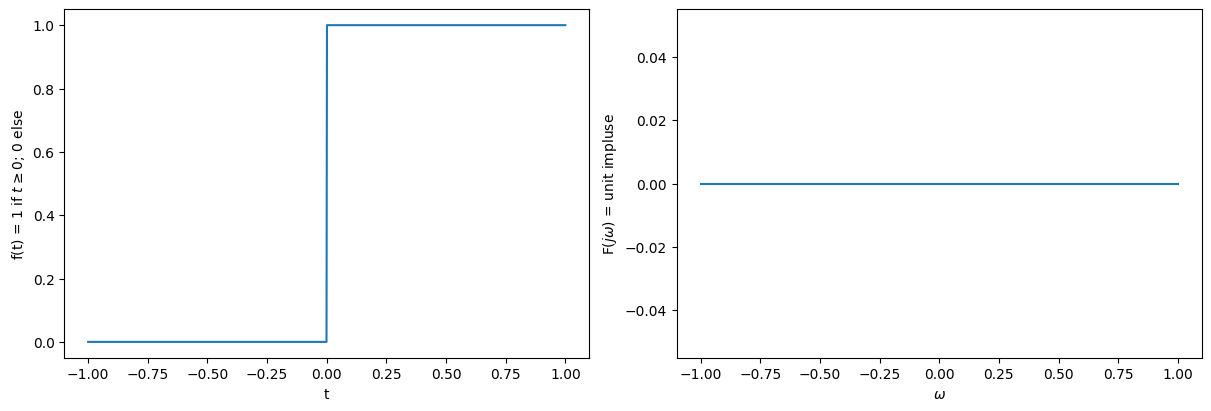

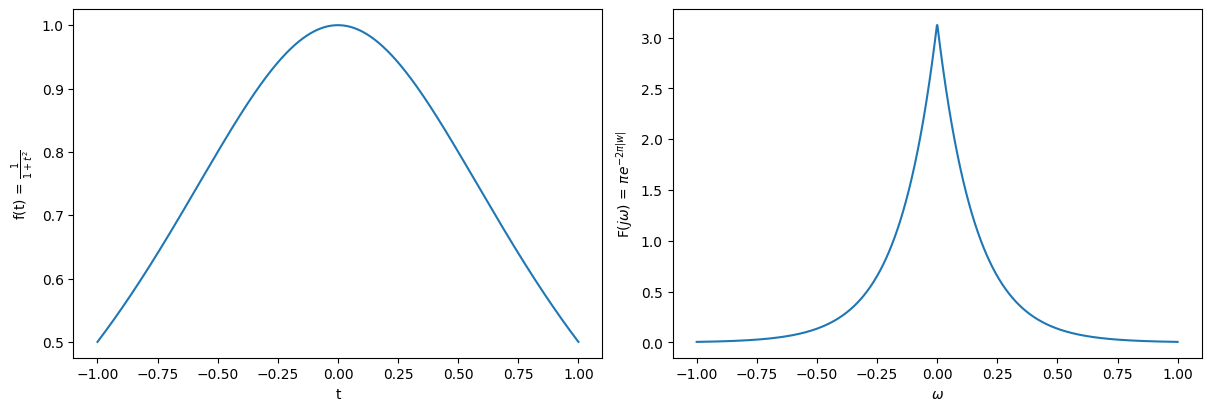

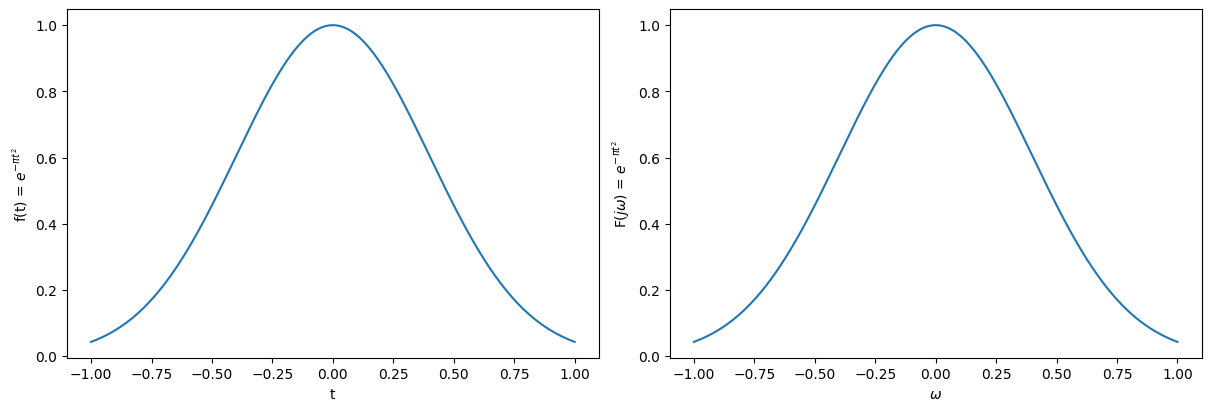

In [9]:
w_vals = np.linspace(-1, 1, 1000)
Ft1 = -sm.I / (2 * sm.pi * w)
Ft1_vals = [sm.re(Ft1.subs(w, w_val).evalf()) for w_val in w_vals]
# Take absolute value of \omega value in Ft2 to account for values of w<0.
Ft2 = np.pi*np.exp(-2*np.pi*np.abs(w_vals))
Ft3 = np.exp(-np.pi * w_vals**2)

# Plot all the functions
fig,ax=plt.subplots(1,2,figsize=(12,4), constrained_layout=True)
t = np.linspace(-1,1,1000)
ax[0].plot(t,ft1_lam(t))
ax[0].set_xlabel("t")
ax[0].set_ylabel("f(t) = $1$ if $t \geq 0$; $0$ else")
ax[1].plot(w_vals,Ft1_vals)
ax[1].set_xlabel("$\omega$")
ax[1].set_ylabel("F($j \omega$) = unit impluse")

fig,bx=plt.subplots(1,2,figsize=(12,4), constrained_layout=True)
t = np.linspace(-1,1,1000)
bx[0].plot(t,ft2_lam(t))
bx[0].set_xlabel("t")
bx[0].set_ylabel("f(t) = $ \\frac{1}{1+t^{2}} $")
bx[1].plot(w_vals,Ft2)
bx[1].set_xlabel("$\omega$")
bx[1].set_ylabel("F($j \omega$) = $\pi e^{- 2 \pi |w|}$")

fig,cx=plt.subplots(1,2,figsize=(12,4), constrained_layout=True)
t = np.linspace(-1,1,1000)
cx[0].plot(t,ft3_lam(t))
cx[0].set_xlabel("t")
cx[0].set_ylabel("f(t) = $e^{- \pi t^{2}}$")
cx[1].plot(w_vals,Ft3)
cx[1].set_xlabel("$\omega$")
cx[1].set_ylabel("F($j \omega$) = $e^{- \pi t^{2}}$")

### 6. Solve a system of ODEs

Similar to the ODE example in the notes, find a solution to the two differential equations

\begin{align}
\dot x & = & -y \\
\dot y & = & -x + u
\end{align}

a) First take the Fourier Transform of both equations.

b) Solve for $Y(s)$ in terms of $U(s)$.

c) Note that the solution for $Y(s)$ involves a function of $s$ times $U(s)$. Figure out the inverse Fourier Transform of that function.

d) Use a convolution to figure out $y(t)$ in terms of $u(t)$.

e) Find $X(s)$ in terms of $Y(s)$ and then $x(t)$ in terms of $y(t)$.

### 7.  Image Processing

Find a nice gray scale image to load, or use the Minion image from class. Call the resulting matrix $m$.

a) Render the image using `matplotlib`.

b) Take the DFT of the image $m$ to get a matrix $M$. Then make a new matrix $M_\mathrm{new}$ in which each entry is just the magnitude of the corresponding entry in $M$. Create a new image from the inverse Fourier transform of this image and render it.

c) Do the same thing, except set the entries in $M_\mathrm{new}$ to the angle of the entries in $M$. Create a new image from the inverse Fourier transform of this image and render it.

d) Do the same thing, except normalize all the entries in $M_\mathrm{new}$ to have magnitude 1. Create a new image from the inverse Fourier transform of this image and render it.

What might you conclude about the information contained in the magnitude of the transformed image? What might you conclude about the information contained in the angle?

In [10]:
import imageio
m = imageio.imread('minion.jpg', mode = "L")

/var/folders/yk/jt754qvd291cbrnny4ybw3_00000gn/T/ipykernel_26796/1747729404.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  m = imageio.imread('minion.jpg', mode = "L")


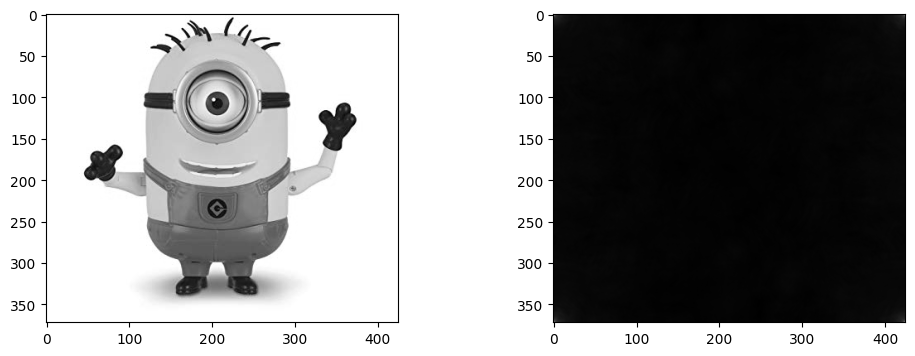

In [11]:
M = np.fft.fft2(m)

m_new = np.abs(M)
m_new = np.fft.ifft2(m_new)
m_new = np.abs(m_new)

fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].imshow(m, cmap = 'gray')
ax[1].imshow(m_new, cmap = 'gray')

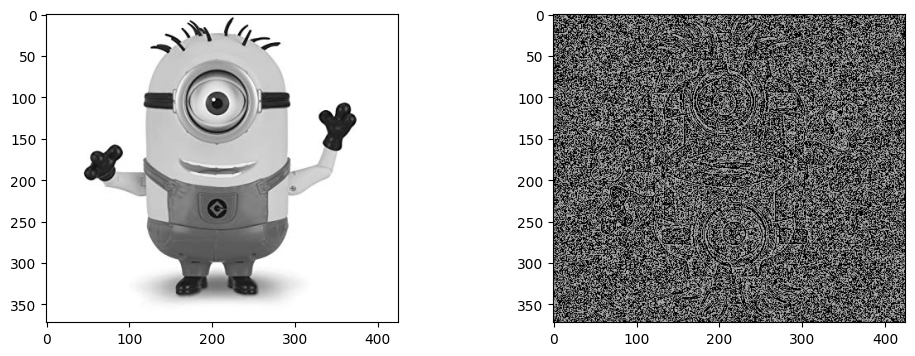

In [12]:
# c 
M = np.fft.fft2(m)

m_new = np.angle(M)
m_new = np.fft.ifft2(m_new)
m_new = np.angle(m_new)

fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].imshow(m, cmap = 'gray')
ax[1].imshow(m_new, cmap = 'gray')

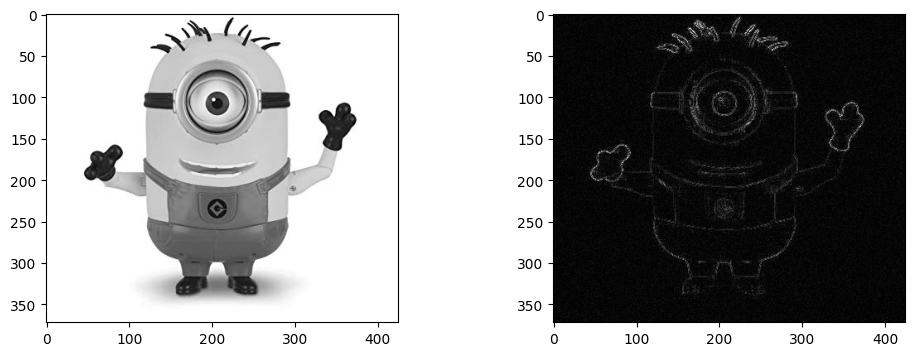

In [13]:
# d
M = np.fft.fft2(m)

mag = np.abs(M)
m_new = M * (1/mag)
m_new = np.fft.ifft2(m_new)
m_new = np.abs(m_new)

fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].imshow(m, cmap = 'gray')
ax[1].imshow(m_new, cmap = 'gray')


7ei) Without magnitude information, there's substantial noise in a reconstructed image and it can be difficult to determine the boundary outlines of your image. In d), a normalized magnitude makes the boundary information stored in the phase component very clear to see. Thus, controlling the intensity (magnitude) of each matrix value helps manage noise in the image.
<br><br>
7eii) The phase information, best depected by plot c) and supported by plot d), contains the location information. The edges of the image are visible in c) and clearly captured in d). Without magnitude information, the plot for c) looks random with thin lines outlining the minon, indicating the phase holds location data.